In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os


In [2]:
import os


dataset_path = r"C:\Users\adity\Downloads/Code/tomato"
print("Dataset root path:", dataset_path)

print("\nIsi folder root:")
for item in os.listdir(dataset_path):
    print("-", item)


Dataset root path: C:\Users\adity\Downloads/Code/tomato

Isi folder root:
- cnn_train.py
- train
- val


In [5]:
import os


TRAIN_DIR = os.path.join(dataset_path, "train")
VAL_DIR   = os.path.join(dataset_path, "val")

print("Train dir:", TRAIN_DIR)
print("Val dir  :", VAL_DIR)

print("\nKelas di train:")
print(os.listdir(TRAIN_DIR))

Train dir: C:\Users\adity\Downloads/Code/tomato\train
Val dir  : C:\Users\adity\Downloads/Code/tomato\val

Kelas di train:
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [6]:
import pandas as pd

image_paths, labels, splits = [], [], []

for split_name, split_dir in [("train", TRAIN_DIR), ("val", VAL_DIR)]:
    for cls in os.listdir(split_dir):
        cls_dir = os.path.join(split_dir, cls)
        if not os.path.isdir(cls_dir):
            continue
        for img in os.listdir(cls_dir):
            image_paths.append(os.path.join(cls_dir, img))
            labels.append(cls)
            splits.append(split_name)

df = pd.DataFrame({
    "path": image_paths,
    "label": labels,
    "split": splits
})

print(df.head())
print("\nJumlah data:")
print(df["split"].value_counts())


                                                path                    label  \
0  C:\Users\adity\Downloads/Code/tomato\train\Tom...  Tomato___Bacterial_spot   
1  C:\Users\adity\Downloads/Code/tomato\train\Tom...  Tomato___Bacterial_spot   
2  C:\Users\adity\Downloads/Code/tomato\train\Tom...  Tomato___Bacterial_spot   
3  C:\Users\adity\Downloads/Code/tomato\train\Tom...  Tomato___Bacterial_spot   
4  C:\Users\adity\Downloads/Code/tomato\train\Tom...  Tomato___Bacterial_spot   

   split  
0  train  
1  train  
2  train  
3  train  
4  train  

Jumlah data:
split
train    10000
val       1000
Name: count, dtype: int64


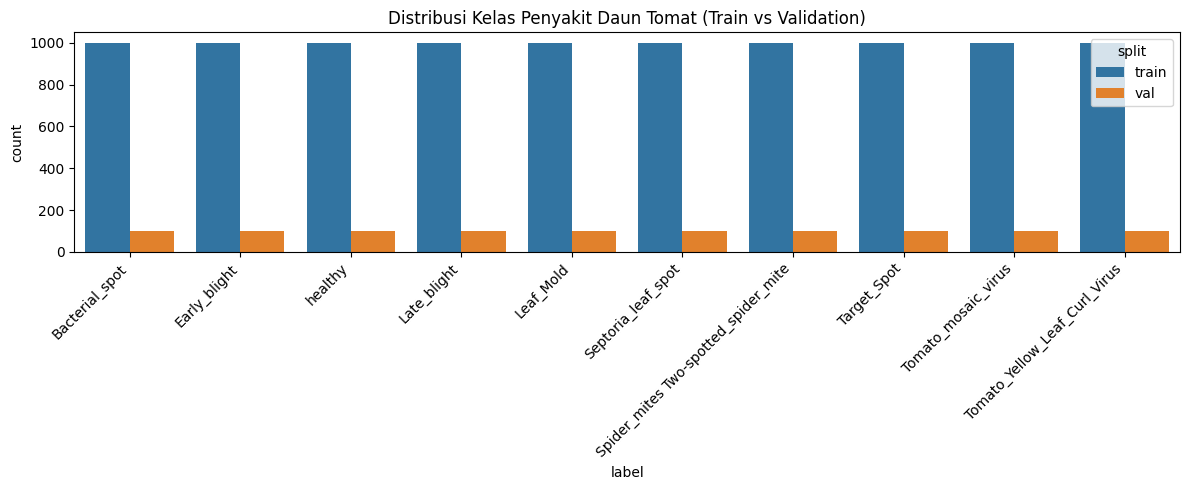

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x=df["label"].str.replace('Tomato___', ''), hue="split")
plt.title("Distribusi Kelas Penyakit Daun Tomat (Train vs Validation)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [9]:
image_formats = {}

# Menggunakan seluruh dataset untuk pemeriksaan format
sample_paths = df["path"] # Mengambil seluruh path gambar dari DataFrame

for path in sample_paths:
    try:
        with Image.open(path) as img:
            fmt = img.format # Get the image format
            if fmt:
                image_formats[fmt] = image_formats.get(fmt, 0) + 1
    except Exception as e:
        # Handle cases where image cannot be opened or format cannot be determined
        print(f"Could not identify format for {path}: {e}")

print("Distribusi Format Gambar:")
for fmt, count in image_formats.items():
    print(f"- {fmt}: {count} gambar")

if not image_formats:
    print("Tidak ada format gambar yang teridentifikasi dari sampel.")

Could not identify format for C:\Users\adity\Downloads/Code/tomato\train\Tomato___Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG: name 'Image' is not defined
Could not identify format for C:\Users\adity\Downloads/Code/tomato\train\Tomato___Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG: name 'Image' is not defined
Could not identify format for C:\Users\adity\Downloads/Code/tomato\train\Tomato___Bacterial_spot\05777829-6912-44bb-bcef-901bc5190584___GCREC_Bact.Sp 6150.JPG: name 'Image' is not defined
Could not identify format for C:\Users\adity\Downloads/Code/tomato\train\Tomato___Bacterial_spot\070228e2-ba4e-4de8-813b-074e51ed6f5a___UF.GRC_BS_Lab Leaf 0661.JPG: name 'Image' is not defined
Could not identify format for C:\Users\adity\Downloads/Code/tomato\train\Tomato___Bacterial_spot\07238109-52ed-4369-b16c-6f5844858b81___UF.GRC_BS_Lab Leaf 0447.JPG: name 'Image' is not defined
Could not identify format for C:\Users\adity\Downl

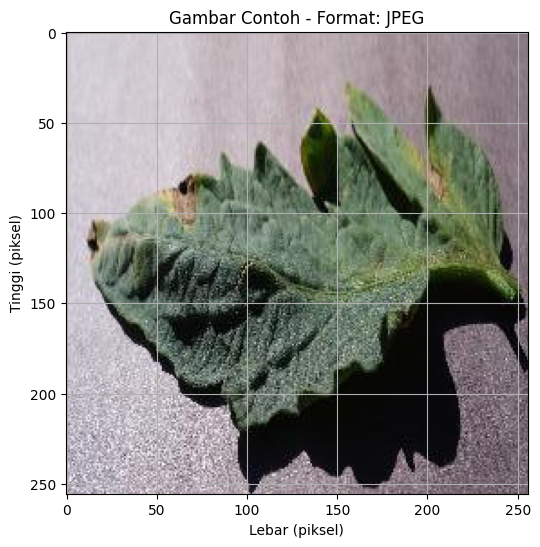

Jalur Gambar: C:\Users\adity\Downloads/Code/tomato\train\Tomato___Early_blight\Tomato___Early_blight_original_809042e0-7587-4a45-93e8-e166c07a55ec___RS_Erly.B 7692.JPG_5653f15f-34c7-41ad-ab9b-36105b5be984.JPG
Format Gambar: JPEG
Resolusi Gambar: 256x256 piksel


In [10]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random

# Ambil satu path gambar secara acak dari DataFrame
sample_image_path = df["path"].sample(1, random_state=random.randint(1, 10000)).iloc[0]

# Baca gambar menggunakan OpenCV untuk tampilan
img_cv2 = cv2.imread(sample_image_path)
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Buka gambar menggunakan PIL untuk mendapatkan format
with Image.open(sample_image_path) as img_pil:
    image_format = img_pil.format

# Tampilkan gambar dengan sumbu
plt.figure(figsize=(6, 6))
plt.imshow(img_cv2_rgb)
plt.title(f"Gambar Contoh - Format: {image_format}")
plt.xlabel("Lebar (piksel)")
plt.ylabel("Tinggi (piksel)")
plt.grid(True)
plt.show()

print(f"Jalur Gambar: {sample_image_path}")
print(f"Format Gambar: {image_format}")
print(f"Resolusi Gambar: {img_cv2.shape[1]}x{img_cv2.shape[0]} piksel")

Ditemukan 11000 nilai brightness dari 11000 gambar dalam dataset.


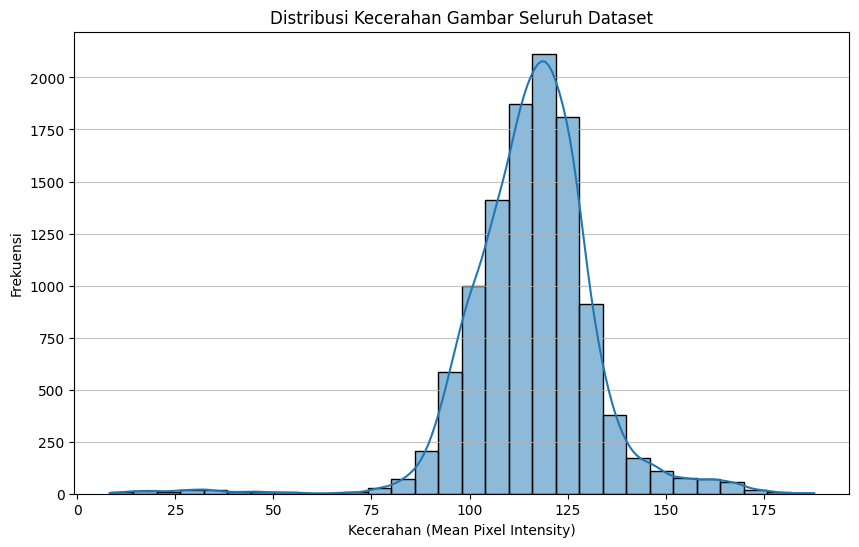

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None # Handle cases where image cannot be read
        # Convert image to grayscale for brightness calculation
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calculate mean pixel intensity as brightness
        return np.mean(gray)
    except Exception as e:
        print(f"Error calculating brightness for {image_path}: {e}")
        return None

brightness_values = []

# Menggunakan seluruh dataset untuk perhitungan kecerahan
sample_paths_brightness = df["path"] # Mengambil seluruh path gambar dari DataFrame

for path in sample_paths_brightness:
    brightness = calculate_brightness(path)
    if brightness is not None:
        brightness_values.append(brightness)

print(f"Ditemukan {len(brightness_values)} nilai brightness dari {len(sample_paths_brightness)} gambar dalam dataset.")

# Plot histogram of brightness values
plt.figure(figsize=(10, 6))
sns.histplot(brightness_values, bins=30, kde=True)
plt.title('Distribusi Kecerahan Gambar Seluruh Dataset')
plt.xlabel('Kecerahan (Mean Pixel Intensity)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ditemukan 11000 nilai blurriness dari 11000 gambar dalam dataset.


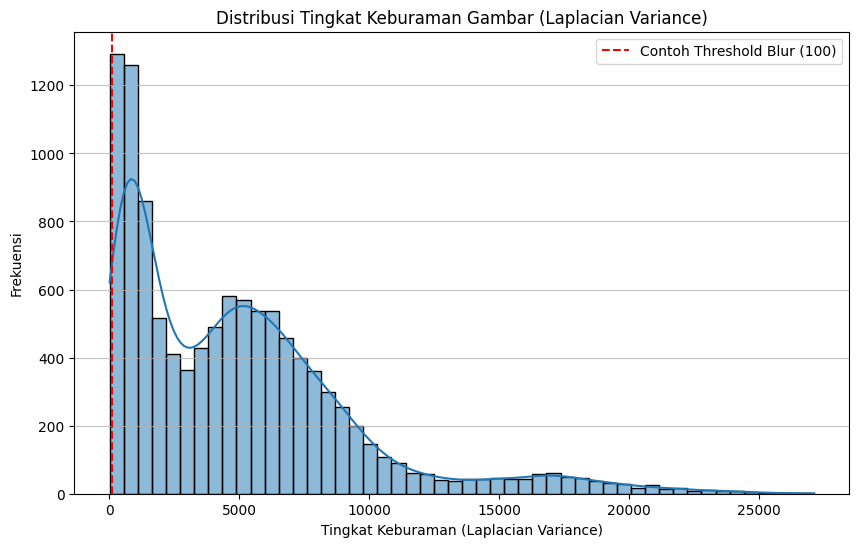

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_blurriness(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None  # Handle cases where image cannot be read

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Laplacian operator and compute its variance
        # Lower variance indicates more blurriness
        return cv2.Laplacian(gray, cv2.CV_64F).var()
    except Exception as e:
        print(f"Error calculating blurriness for {image_path}: {e}")
        return None

blurriness_values = []

# Menggunakan seluruh dataset untuk perhitungan keburaman
sample_paths_blurriness = df["path"] # Mengambil seluruh path gambar dari DataFrame

for path in sample_paths_blurriness:
    blurriness = calculate_blurriness(path)
    if blurriness is not None:
        blurriness_values.append(blurriness)

print(f"Ditemukan {len(blurriness_values)} nilai blurriness dari {len(sample_paths_blurriness)} gambar dalam dataset.")

# Plot histogram of blurriness values
plt.figure(figsize=(10, 6))
sns.histplot(blurriness_values, bins=50, kde=True)
plt.title('Distribusi Tingkat Keburaman Gambar (Laplacian Variance)')
plt.xlabel('Tingkat Keburaman (Laplacian Variance)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.axvline(x=100, color='r', linestyle='--', label='Contoh Threshold Blur (100)') # Contoh threshold
plt.legend()
plt.show()

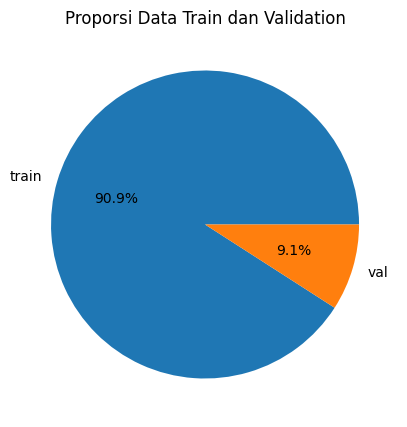

In [13]:
df["split"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(5,5),
    title="Proporsi Data Train dan Validation"
)
plt.ylabel("")
plt.show()


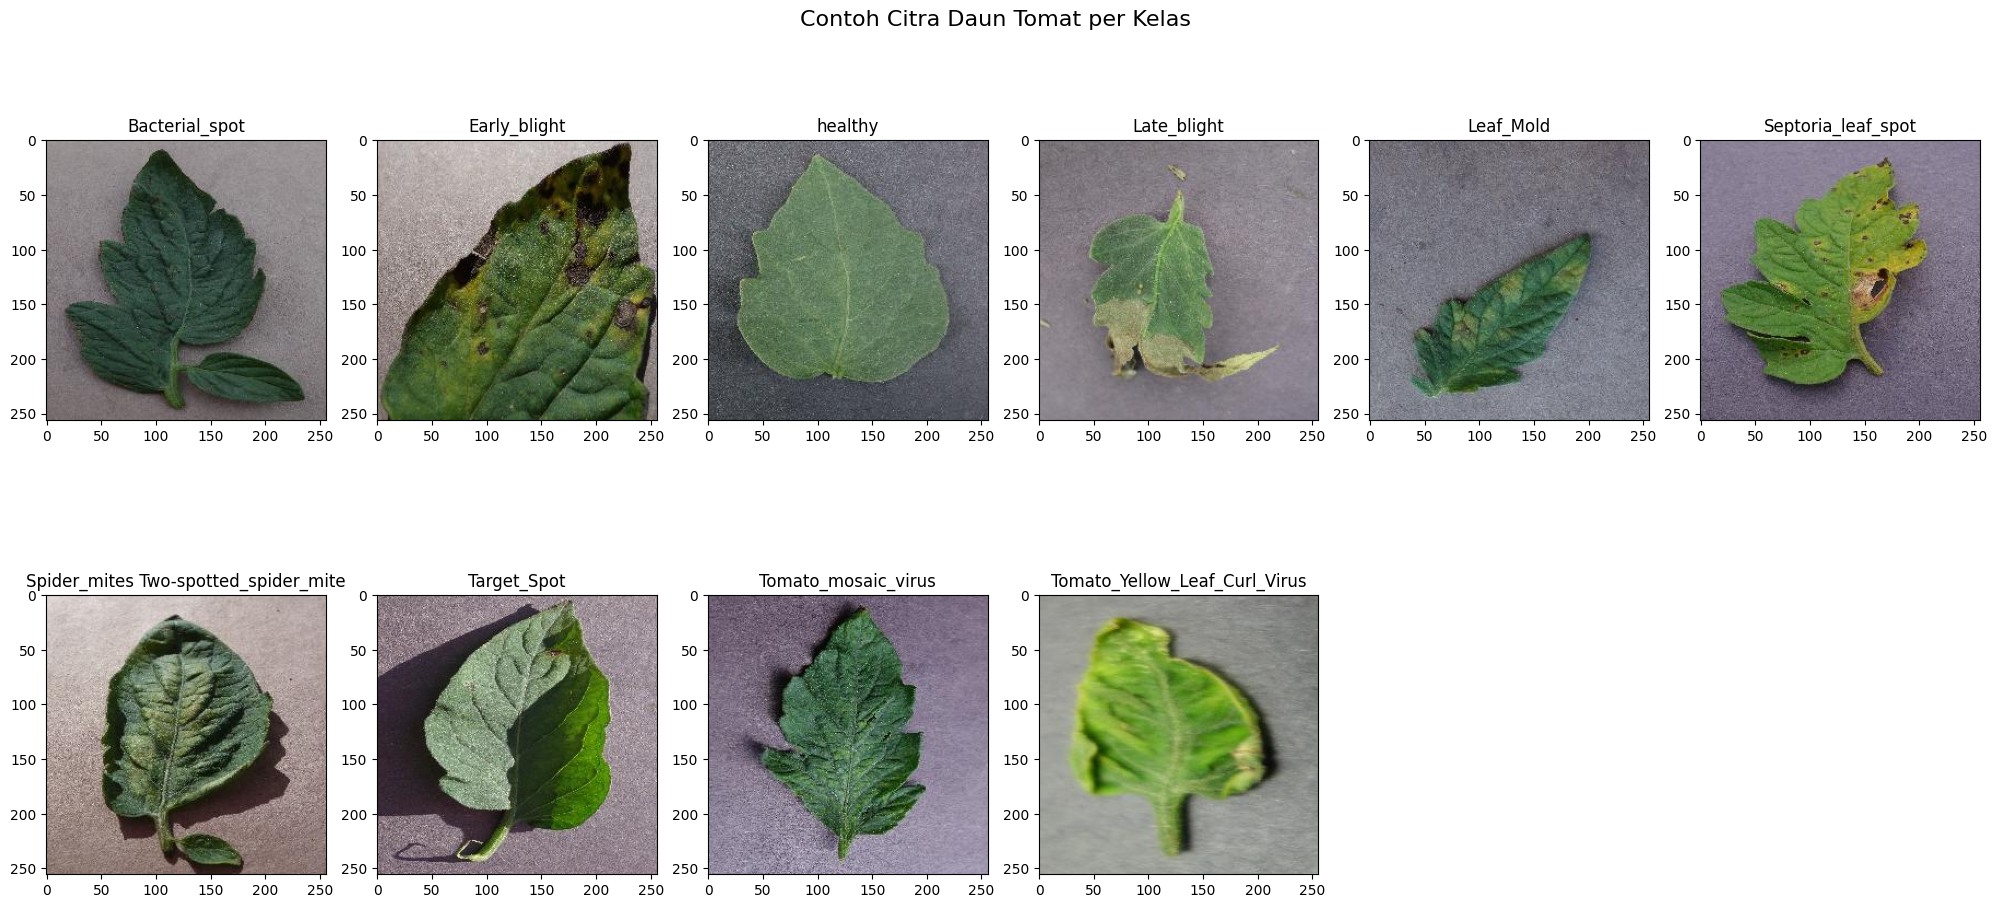

In [14]:
import cv2

classes = df["label"].unique()

plt.figure(figsize=(20,10)) # Increased figure width
for i, cls in enumerate(classes):
    sample_path = df[df["label"] == cls]["path"].iloc[0]
    img = cv2.imread(sample_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, len(classes)//2 + 1, i+1)
    plt.imshow(img)
    plt.title(cls.replace("Tomato___", ""))
    # plt.axis("off") # Menghapus baris ini agar sumbu ditampilkan

plt.suptitle("Contoh Citra Daun Tomat per Kelas", fontsize=16) # Optionally increase suptitle font size
plt.tight_layout()
plt.show()

In [15]:
import numpy as np

widths, heights = [], []

for path in df["path"].sample(400, random_state=42):
    img = cv2.imread(path)
    if img is not None:
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)

print(f"Resolusi minimum  : {min(widths)} x {min(heights)}")
print(f"Resolusi maksimum : {max(widths)} x {max(heights)}")
print(f"Resolusi rata-rata: {int(np.mean(widths))} x {int(np.mean(heights))}")


Resolusi minimum  : 256 x 256
Resolusi maksimum : 256 x 256
Resolusi rata-rata: 256 x 256


In [16]:
import numpy as np

# Define brightness thresholds (adjust as needed)
brightness_lower_threshold = 50 # Example: images with mean pixel intensity below 50 are considered too dark
brightness_upper_threshold = 200 # Example: images with mean pixel intensity above 200 are considered too bright

# Identify problematic brightness
problematic_brightness_count = 0
for val in brightness_values:
    if val < brightness_lower_threshold or val > brightness_upper_threshold:
        problematic_brightness_count += 1

print(f"Jumlah gambar dengan kecerahan bermasalah (terlalu gelap atau terlalu terang): {problematic_brightness_count} dari {len(brightness_values)}")


Jumlah gambar dengan kecerahan bermasalah (terlalu gelap atau terlalu terang): 86 dari 11000


In [17]:
# Define blurriness threshold (adjust as needed)
blurriness_threshold = 100 # Example: images with Laplacian variance below 100 are considered blurry

# Identify problematic blurriness
problematic_blurriness_count = 0
for val in blurriness_values:
    if val < blurriness_threshold:
        problematic_blurriness_count += 1

print(f"Jumlah gambar dengan keburaman bermasalah (di bawah threshold {blurriness_threshold}): {problematic_blurriness_count} dari {len(blurriness_values)}")


Jumlah gambar dengan keburaman bermasalah (di bawah threshold 100): 276 dari 11000


Menampilkan 5 contoh gambar dengan kecerahan bermasalah...


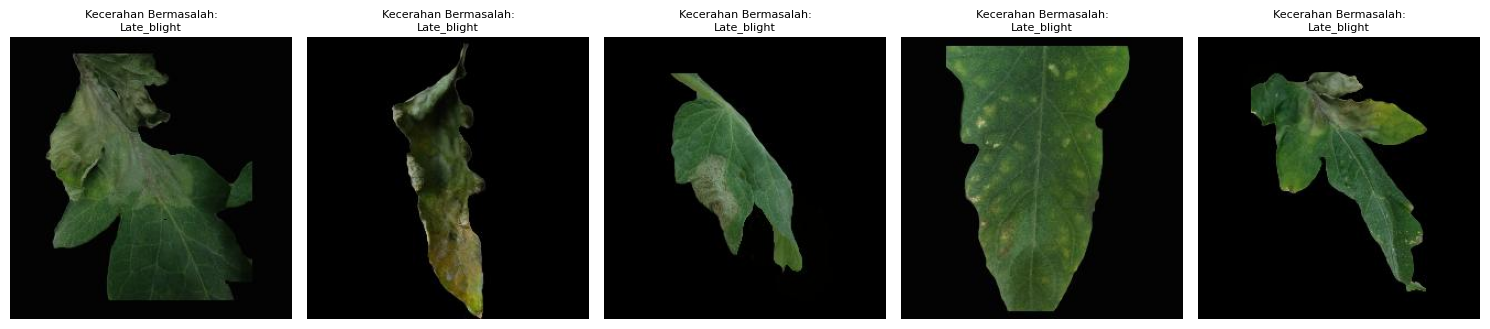

Total gambar dengan kecerahan bermasalah: 86


In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming brightness_values and df are already available from previous steps
# and brightness_lower_threshold, brightness_upper_threshold are defined.

problematic_brightness_paths = []
problematic_brightness_labels = []

for i, brightness_val in enumerate(brightness_values):
    if brightness_val < brightness_lower_threshold or brightness_val > brightness_upper_threshold:
        problematic_brightness_paths.append(df['path'].iloc[i])
        problematic_brightness_labels.append(df['label'].iloc[i])

print(f"Menampilkan {min(len(problematic_brightness_paths), 5)} contoh gambar dengan kecerahan bermasalah...")

plt.figure(figsize=(15, 6))
for i in range(min(len(problematic_brightness_paths), 5)): # Display up to 5 examples
    path = problematic_brightness_paths[i]
    label = problematic_brightness_labels[i]
    img = cv2.imread(path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(len(problematic_brightness_paths), 5), i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Kecerahan Bermasalah:\n{label.replace('Tomato___', '')}", fontsize=8)
        plt.axis('off')
    else:
        print(f"Could not load image: {path}")
plt.tight_layout()
plt.show()

print(f"Total gambar dengan kecerahan bermasalah: {len(problematic_brightness_paths)}")


Menampilkan 5 contoh gambar dengan keburaman bermasalah...


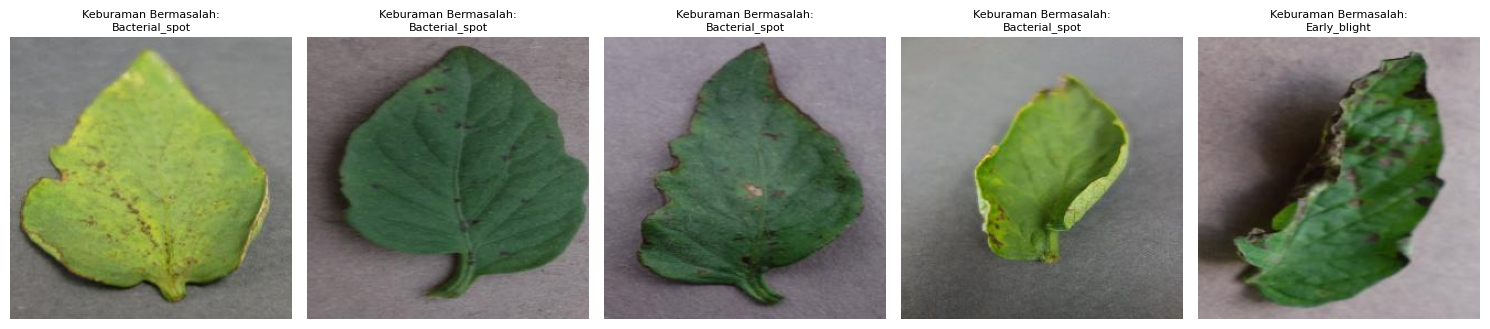

Total gambar dengan keburaman bermasalah: 276


In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming blurriness_values and df are already available from previous steps
# and blurriness_threshold is defined.

problematic_blurriness_paths = []
problematic_blurriness_labels = []

for i, blur_val in enumerate(blurriness_values):
    if blur_val < blurriness_threshold:
        problematic_blurriness_paths.append(df['path'].iloc[i])
        problematic_blurriness_labels.append(df['label'].iloc[i])

print(f"Menampilkan {min(len(problematic_blurriness_paths), 5)} contoh gambar dengan keburaman bermasalah...")

plt.figure(figsize=(15, 6))
for i in range(min(len(problematic_blurriness_paths), 5)): # Display up to 5 examples
    path = problematic_blurriness_paths[i]
    label = problematic_blurriness_labels[i]
    img = cv2.imread(path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, min(len(problematic_blurriness_paths), 5), i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Keburaman Bermasalah:\n{label.replace('Tomato___', '')}", fontsize=8)
        plt.axis('off')
    else:
        print(f"Could not load image: {path}")
plt.tight_layout()
plt.show()

print(f"Total gambar dengan keburaman bermasalah: {len(problematic_blurriness_paths)}")


In [20]:
import cv2
import os

corrupted_images = []

for path in df["path"]:
    # Check if the file path exists first
    if not os.path.exists(path):
        corrupted_images.append((path, "File not found"))
        continue

    try:
        img = cv2.imread(path)
        if img is None:
            corrupted_images.append((path, "Failed to read image"))
    except Exception as e:
        corrupted_images.append((path, f"Error: {e}"))

if corrupted_images:
    print(f"Ditemukan {len(corrupted_images)} gambar yang rusak atau tidak dapat dibaca.")
    print("Beberapa contoh gambar yang rusak:")
    for i, (path, reason) in enumerate(corrupted_images[:5]): # Tampilkan 5 contoh pertama
        print(f"- {path} (Alasan: {reason})")
else:
    print("Tidak ada gambar yang rusak atau tidak dapat dibaca ditemukan dalam dataset.")

Tidak ada gambar yang rusak atau tidak dapat dibaca ditemukan dalam dataset.
